In [15]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [16]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data_ven.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [17]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [18]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.590164    2.006508    5.729107    2.632877
std     18.833219    0.463560    1.392486    2.567604
min     15.000000    1.072000    2.671000   -9.459000
25%     32.250000    1.700750    4.726500    1.245250
50%     41.000000    1.945000    5.430000    2.597500
75%     59.750000    2.298500    6.481000    3.998750
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.710617  0.939526   -0.105767
Peace        -0.710617  1.000000 -0.669419   -0.018241
Legal         0.939526 -0.669419  1.000000   -0.127215
GDP Growth   -0.105767 -0.018241 -0.127215    1.000000


C:\Users\gmimo\AppData\Local\Temp\ipykernel_7176\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


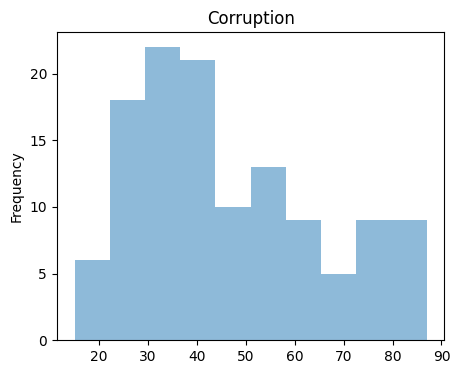

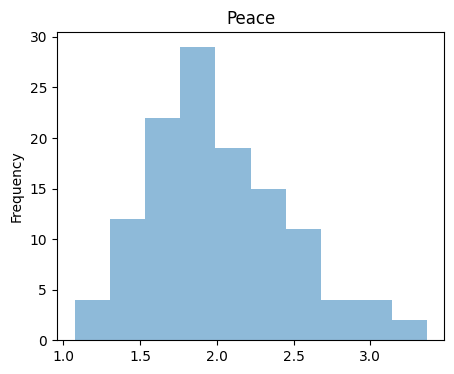

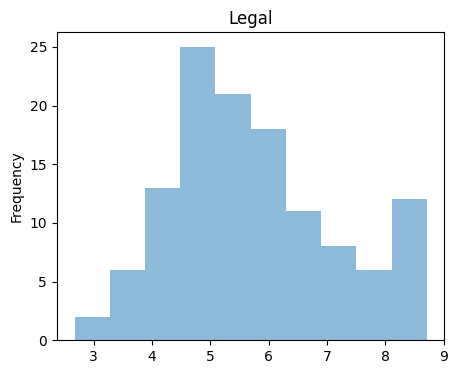

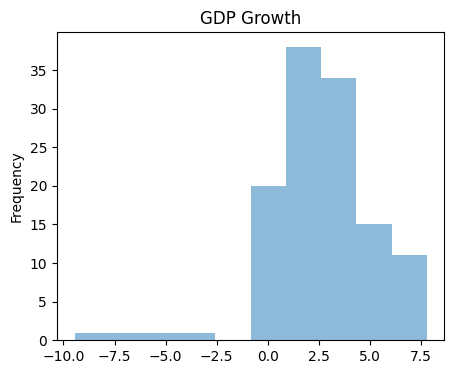

In [19]:
# plot histograms
plt.figure(1, figsize=(5,4))
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2, figsize=(5,4))
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3, figsize=(5,4))
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4, figsize=(5,4))
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [20]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.400182 -0.849636    0.136362
1  0.458391 -0.929350   -0.031110
2 -0.037769 -0.461122   -2.217584
3  0.620183 -0.658611    1.311387
4 -1.267384  1.891504   -0.358263


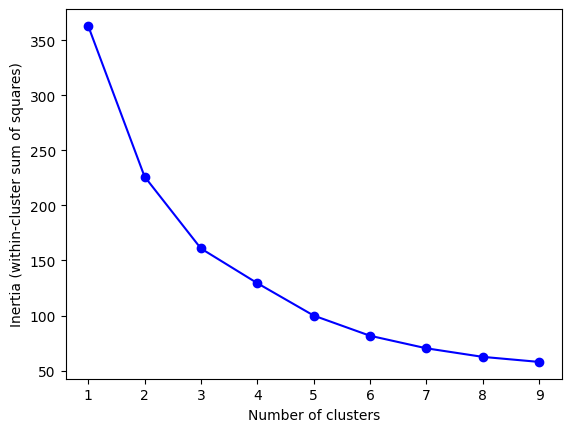

In [21]:
#Perform elbow method
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
Ks = range(1, 10)
inertia = [KMeans(i, n_init=10).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


In [22]:
#K means with k=3
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 160.88314396490787
cluster centers:  [[ 0.21718981 -0.51643275  0.66367961]
 [ 1.21754466 -0.85937789 -1.07131133]
 [-0.85901277  1.02470929 -0.22901867]]
cluster labels:  [0 0 1 0 2 2 0 0 0 2 0 0 0 2 1 0 1 0 2 1 2 0 0 2 0 2 2 1 2 0 1 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 1 2 0 2 2 2 2 0 0 2 2 2 1 1 2 0 0 2 0 0 2 1 0 0 0 0
 0 2 2 1 1 2 2 1 0 1 0 0 2 2 2 2 1 0 1 0 0 0 2 2 2 1 2 0 2 2 2 0 0 0 1 0 1
 0 1 2 2 2 2 1 0 1 0 1]


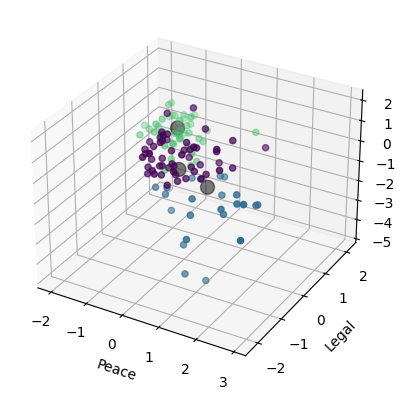

In [23]:
#Visualize the result (3D plot)
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()


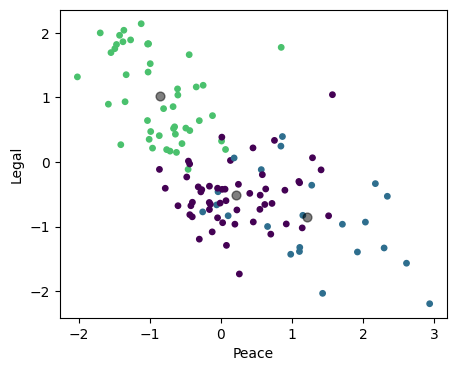

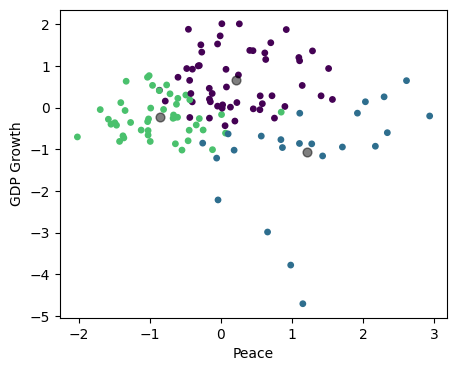

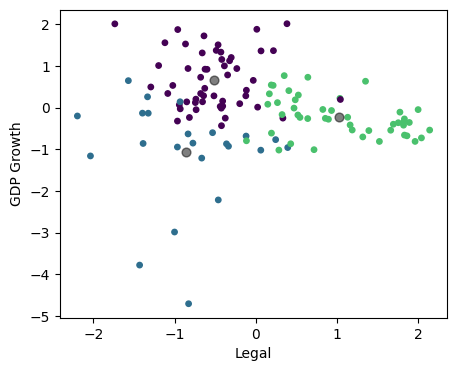

In [24]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i, figsize=(5,4))
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=15)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=40, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

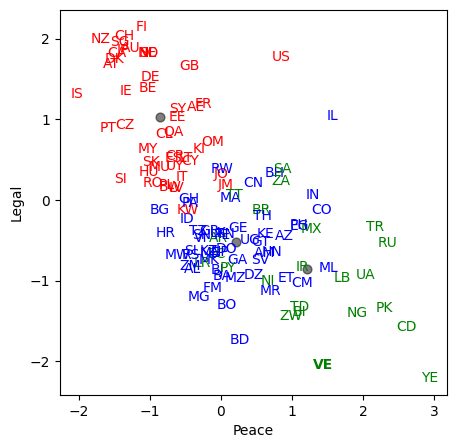

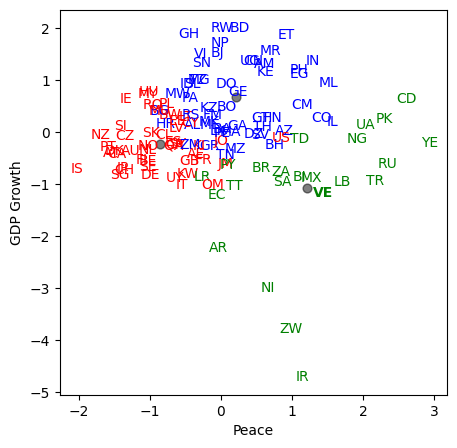

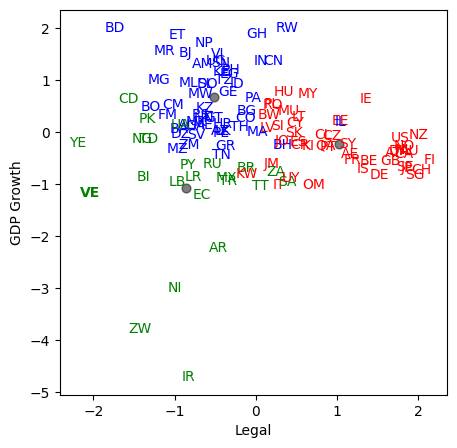

In [25]:
#Visualize the result (3 2D plots)
#plot country abbreviations instead of dots.
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(5, 5))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=40, alpha=0.5)
    for j in range(X.shape[0]):
        if raw.loc[j, 'Abbrev'] == 'VE':
            plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='bold', horizontalalignment = 'center', verticalalignment = 'center')
        else:
            plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                    color=colors[y[j]], horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [26]:
print(X.columns)
print(centers)

Index(['Peace', 'Legal', 'GDP Growth'], dtype='object')
[[ 0.21718981 -0.51643275  0.66367961]
 [ 1.21754466 -0.85937789 -1.07131133]
 [-0.85901277  1.02470929 -0.22901867]]


Label | Peace | Legal | GDP | => Risk
---|---|---|---|---
0|++|++|+++|Low
1|+|+|+|High
2|+++|+++|++|Moderate

In [27]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
result.loc[:, 'Risk'] = result['Label'].replace({0: 'Low', 1: 'High', 2: 'Moderate'})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country  ...      Risk
0                         Albania  ...       Low
31                          Egypt  ...       Low
64                         Malawi  ...       Low
34                       Ethiopia  ...       Low
91                         Rwanda  ...       Low
37                          Gabon  ...       Low
38                        Georgia  ...       Low
85                    Philippines  ...       Low
40                          Ghana  ...       Low
41                         Greece  ...       Low
42                      Guatemala  ...       Low
43                       Honduras  ...       Low
84                           Peru  ...       Low
93                        Senegal  ...       Low
46                          India  ...       Low
82                         Panama  ...       Low
50                         Israel  ...       Low
74                          Nepal  ...       Low
73                     Mozambique  ...       Low
55                  

In [28]:
result.to_csv('results_kmeans_elbow_ven.csv') 